# Importing Libraries

In [9]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier

#  Loading Datasets

In [10]:
#reading the dataset of both fake and true news
data_fake=pd.read_csv("Fake.csv")
data_true=pd.read_csv("True.csv")

In [11]:
#data fake
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
#data true
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
#creating an output/target column 
#fake news - 0
#true news - 1
data_fake['class']=0
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


#  Creating Dataset for Model Building

In [14]:
#output column assigning to true news dataframe
data_true['class']=1
data_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
#checking the shape
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [16]:
#concatinating the two dataframe of fake and true news
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
#printing the column names
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
#droping the unnecessary columns
data=data_merge.drop(['title','subject','date'],axis=1)                                                      

In [19]:
#checking the null values
data.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
#shuffling the entire dataset,This is commonly used before splitting the
#data into training and testing sets to ensure that the training and testing sets are representative of the overall dataset.
data=data.sample(frac=1)  #randomly picking data in 1D

In [21]:
#taking the head of shuffled data,index also got shuffled
data.head()

,text,class
9563,"On October 25, 2017, the liberal Boston Globe ...",0
4114,Donald Trump is semi-right: this election migh...,0
14575,JOHANNESBURG (Reuters) - Leaders of Zimbabwe s...,1
13126,Trump has invited an interesting and powerful ...,0
17963,Is karma knocking on her door?Mayor Lyda Krews...,0


In [22]:
#resetting the index and droping the shuffled index
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

#  EDA

In [23]:
data.columns

Index(['text', 'class'], dtype='object')

In [24]:
data.head()

,text,class
0,"On October 25, 2017, the liberal Boston Globe ...",0
1,Donald Trump is semi-right: this election migh...,0
2,JOHANNESBURG (Reuters) - Leaders of Zimbabwe s...,1
3,Trump has invited an interesting and powerful ...,0
4,Is karma knocking on her door?Mayor Lyda Krews...,0


In [25]:
data.shape

(44898, 2)

In [26]:
data.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [27]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


#  Preprocessing Text Data

In [29]:
def wordopt(text): #creating function to process text
    text=text.lower()# Convert text to lowercase
    text=re.sub('\[.*?\]',' ',text)# Remove square brackets and content inside them
    text=re.sub("\\W"," ",text)# Remove non-word characters
    text=re.sub('https?://\S+|www\.\S+','',text)# Remove URLs
    text=re.sub('<.*?>+','',text)# Remove HTML tags
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)# Remove punctuation
    text=re.sub('\n','',text)# Remove newline characters
    text=re.sub('\w*\d\w*','',text) # Remove words containing digits
    return text

In [30]:
#applies the wordopt function to each element in the 'text' column of the DataFrame 'data'
data['text']=data['text'].apply(wordopt)

#  Data Visualization

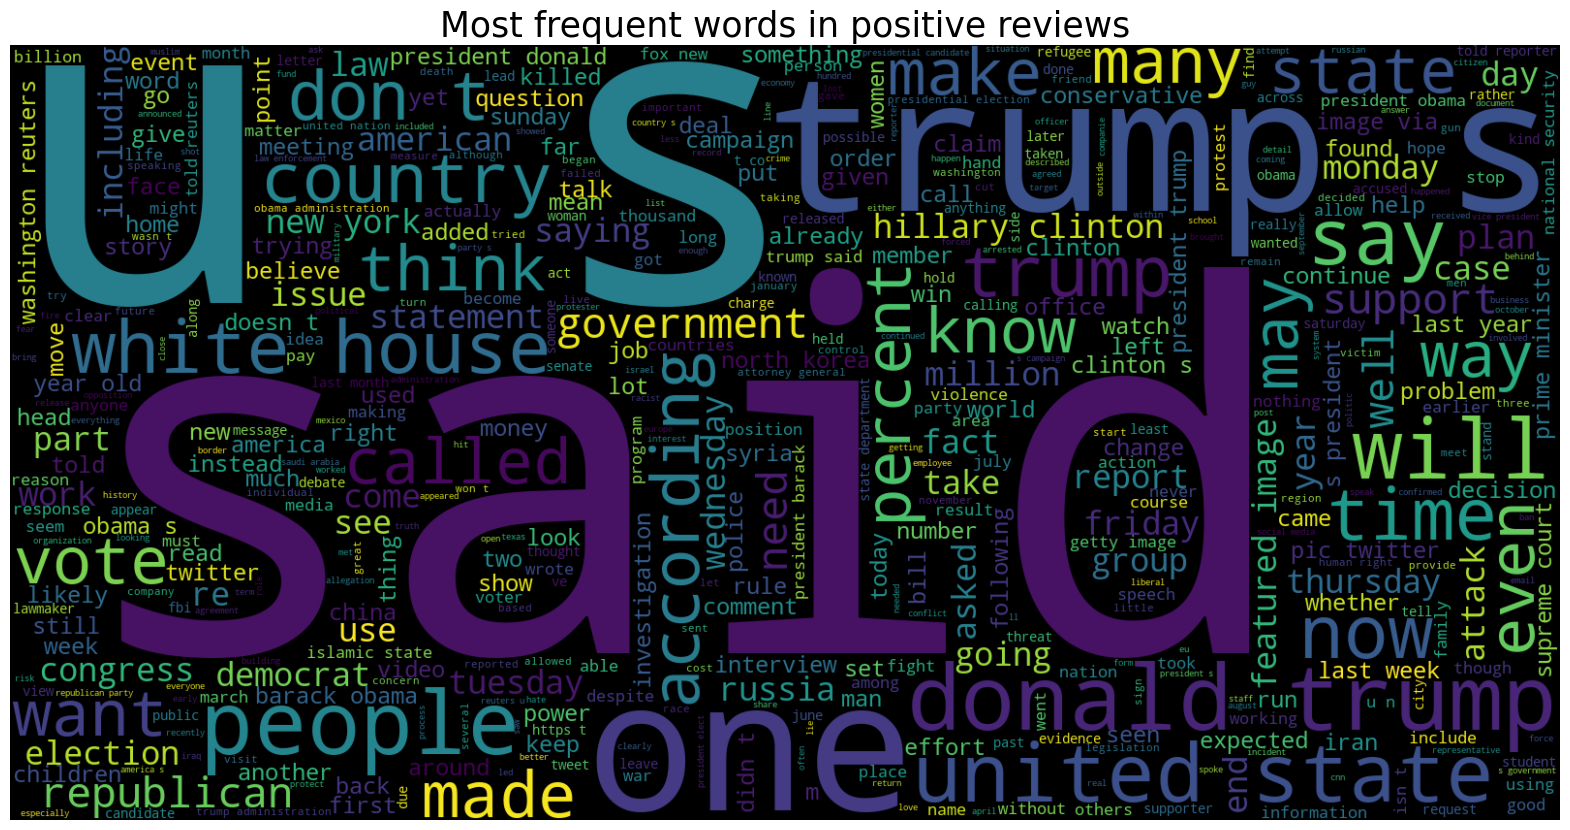

In [31]:
#creating a word cloud visualization using the WordCloud library
text=' '.join([word for word in data['text']])#Concatenates all the text entries in the 'text' column of the DataFrame data into a single string.
plt.figure(figsize=(20,15),facecolor='None')#Sets up the figure for plotting with a specified size and no background color.
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)#Creates a WordCloud object with parameters such as maximum number of words (max_words), width, and height. It then generates the word cloud based on the concatenated text.
plt.imshow(wordcloud,interpolation='bilinear')#Displays the word cloud using the imshow function from matplotlib with bilinear interpolation.
plt.axis("off")#Turns off the axis for a cleaner visualization
plt.title('Most frequent words in positive reviews', fontsize=25)#Sets the title for the word cloud.
plt.show()#Displays the word cloud visualization.

#  Data Splitting

In [32]:
x=data['text']#feature or independent variable
y=data['class']#target or dependent variable

In [33]:
x

0        on october     the liberal boston globe ran an...
1        donald trump is semi right  this election migh...
2        johannesburg  reuters    leaders of zimbabwe s...
3        trump has invited an interesting and powerful ...
4        is karma knocking on her door mayor lyda krews...
                               ...                        
44893    washington  reuters    the u s  house intellig...
44894    on thursday  u s  district judge daniel jordan...
44895    here are just a few examples of the empty or m...
44896    it s happening  the incredibly stupid saga tha...
44897    rome  reuters     this october  story has been...
Name: text, Length: 44898, dtype: object

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)#training data, testing data split

In [35]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(33673,) (11225,) (33673,) (11225,)


#  NLP

In [36]:
#vectorising using  TF-IDF
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [37]:
xv_train.shape

(33673, 95332)

In [38]:
xv_test.shape

(11225, 95332)

#  Model Building

### Logistic Regression 

In [39]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [41]:
pred_lr2=LR.predict(xv_train)
pred_lr2

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
LR_acc=LR.score(xv_test,y_test)
LR_acc

0.9874387527839643

In [43]:
print(classification_report(y_test,pred_lr1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5960
           1       0.99      0.99      0.99      5265

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



### Decision Tree Classifier

In [44]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [45]:
pred_dt1=DT.predict(xv_test)
pred_dt1

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
pred_dt2=DT.predict(xv_train)
pred_dt2

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
DT_acc=accuracy_score(y_test,pred_dt1)
DT_acc

0.9959910913140312

In [48]:
precision_score(y_test,pred_dt1)

0.9960091220068416

###  Gradient Boosting Classifier

In [49]:
GB=GradientBoostingClassifier()
GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [50]:
pred_gb=GB.predict(xv_test)
#pred_gb=GB.predict(xv_train)
pred_gb

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
GB_acc=accuracy_score(y_test,pred_gb)
GB_acc

0.9958129175946547

In [52]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5960
           1       0.99      1.00      1.00      5265

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



### Random Forest Classifier 

In [53]:
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [54]:
pred_rf=RF.predict(xv_test)

In [55]:
RF_acc=RF.score(xv_test,y_test)
RF_acc

0.9910913140311804

In [56]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_rf))

[[5914   46]
 [  54 5211]]


## Performance Analysis on each model 

In [57]:
test_acc=[]
train_acc=[]
for i in[LR,GB,RF,DT]:
    i.fit(xv_train,y_train)
    test_acc.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
    train_acc.append(round(accuracy_score(y_train,i.predict(xv_train))*100,2))
print(test_acc)
print(train_acc)

[98.74, 99.57, 99.11, 99.6]
[99.11, 99.69, 100.0, 100.0]
